In [0]:
import numpy as np
import pandas as pd

from sklearn.model_selection import GridSearchCV, train_test_split,cross_validate
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.ensemble import GradientBoostingRegressor as gb
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt
import seaborn as sns

In [0]:
def rmseByDepth(y_test,y_pred,h = 2.5,delta = 2.5,jump = 5,maxh = 110):

    hList = []
    rmseList = []
    df = pd.DataFrame()

    while h < maxh:
        hList.append(h)
        idx = np.where((y_test >= h - delta) & (y_test < h + delta))
        rmse = mse(y_test[idx],y_pred[idx],squared = False)
        rmseList.append(rmse)        
        h = h + jump
    
    df['h'] = hList
    df['rmse'] = rmseList
    
    return df

In [35]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data_A = pd.read_csv("/content/drive/My Drive/TFM/train-test-val/data_AL.csv")
data_B = pd.read_csv("/content/drive/My Drive/TFM/train-test-val/data_B.csv")
data_C = pd.read_csv("/content/drive/My Drive/TFM/train-test-val/data_C.csv")
data_G = pd.read_csv("/content/drive/My Drive/TFM/train-test-val/data_G.csv")

In [0]:
data_A = pd.read_csv("C:/Users/Dave Mont/Desktop/Master_of_DataScience/TFM/Results/depth_estimation/train-test-val/data_AL.csv")
data_B = pd.read_csv("C:/Users/Dave Mont/Desktop/Master_of_DataScience/TFM/Results/depth_estimation/train-test-val/data_B.csv")
data_C = pd.read_csv("C:/Users/Dave Mont/Desktop/Master_of_DataScience/TFM/Results/depth_estimation/train-test-val/data_C.csv")
data_G = pd.read_csv("C:/Users/Dave Mont/Desktop/Master_of_DataScience/TFM/Results/depth_estimation/train-test-val/data_G.csv")

In [0]:
X_A = data_A.iloc[:,3:]
y_A = data_A.iloc[:,0]

X_B = data_B.iloc[:,3:]
y_B = data_B.iloc[:,0]

X_C = data_C.iloc[:,3:]
y_C = data_C.iloc[:,0]

X_G = data_G.iloc[:,3:]
y_G = data_G.iloc[:,0]

X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(X_A,y_A,test_size = 0.05,random_state = 20)
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_B,y_B,test_size = 0.05,random_state = 20)
X_train_C, X_test_C, y_train_C, y_test_C = train_test_split(X_C,y_C,test_size = 0.05,random_state = 20)
X_train_G, X_test_G, y_train_G, y_test_G = train_test_split(X_G,y_G,test_size = 0.05,random_state = 20)

In [0]:
X_train = pd.concat([X_train_A,X_train_B,X_train_C,X_train_G])
y_train = pd.concat([y_train_A,y_train_B,y_train_C,y_train_G])
y_test = np.array(pd.concat([y_test_A,y_test_B,y_test_C,y_test_G]))

In [0]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# Linear Regression (LR)

In [0]:
cv_results = pd.DataFrame(cross_validate(LinearRegression(),X_train,y_train,cv = 10,scoring = ["neg_root_mean_squared_error","r2"]))
cv_results['test_neg_root_mean_squared_error'] = cv_results['test_neg_root_mean_squared_error']*-1
cv_results.to_csv("C:/Users/Dave Mont/Desktop/Master_of_DataScience/TFM/Results/depth_estimation/test-results/cvresults-LR.csv",index = False)

In [0]:
rmse_mean = cv_results['test_neg_root_mean_squared_error'].mean()
rmse_std = cv_results['test_neg_root_mean_squared_error'].std()
print("RMSE: %0.3f +/- %0.3f" % (rmse_mean,rmse_std/np.sqrt(10)))

RMSE: 14.810 +/- 1.294


In [0]:
reg = LinearRegression().fit(X_train,y_train)

In [0]:
y_pred_A = reg.predict(scaler.transform(X_test_A))
y_pred_B = reg.predict(scaler.transform(X_test_B))
y_pred_C = reg.predict(scaler.transform(X_test_C))
y_pred_G = reg.predict(scaler.transform(X_test_G))

ys_A = pd.DataFrame({"y_test":y_test_A,"y_pred":y_pred_A})
ys_B = pd.DataFrame({"y_test":y_test_B,"y_pred":y_pred_B})
ys_C = pd.DataFrame({"y_test":y_test_C,"y_pred":y_pred_C})
ys_G = pd.DataFrame({"y_test":y_test_G,"y_pred":y_pred_G})

ys_A.to_csv("/content/drive/My Drive/TFM/train-test-val/ytest-ypred-A-LR.csv",index = False)
ys_B.to_csv("/content/drive/My Drive/TFM/train-test-val/ytest-ypred-B-LR.csv",index = False)
ys_C.to_csv("/content/drive/My Drive/TFM/train-test-val/ytest-ypred-C-LR.csv",index = False)
ys_G.to_csv("/content/drive/My Drive/TFM/train-test-val/ytest-ypred-G-LR.csv",index = False)

In [42]:
print("Alto-Lindoso = R2: %0.2f, RMSE %0.3f" % (r2(y_test_A,y_pred_A),mse(y_test_A,y_pred_A,squared = False)))
print("Bubal = R2: %0.2f, RMSE %0.3f" % (r2(y_test_B,y_pred_B),mse(y_test_B,y_pred_B,squared = False)))
print("Canelles = R2: %0.2f, RMSE %0.3f" % (r2(y_test_C,y_pred_C),mse(y_test_C,y_pred_C,squared = False)))
print("Grado = R2: %0.2f, RMSE %0.3f" % (r2(y_test_G,y_pred_G),mse(y_test_G,y_pred_G,squared = False)))

Alto-Lindoso = R2: 0.53, RMSE 10.269
Bubal = R2: 0.04, RMSE 9.245
Canelles = R2: 0.55, RMSE 19.061
Grado = R2: 0.53, RMSE 10.656


In [0]:
y_pred = np.concatenate((y_pred_A,y_pred_B,y_pred_C,y_pred_G))

In [0]:
print("Total = R2: %0.2f, RMSE %0.3f" % (r2(y_test,y_pred),mse(y_test,y_pred,squared = False)))

Total = R2: 0.60, RMSE 15.170


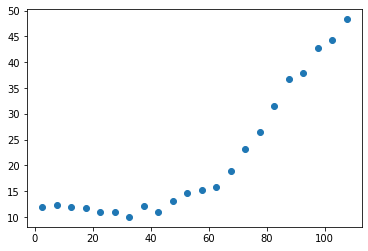

In [0]:
rmseDepth = rmseByDepth(y_test,y_pred)
rmseDepth.to_csv("C:/Users/Dave Mont/Desktop/Master_of_DataScience/TFM/Results/depth_estimation/test-results/depth-rmse-LR.csv",index = False)
plt.scatter(rmseDepth['h'],rmseDepth['rmse'])

In [0]:
ys = pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
ys.to_csv("/content/drive/My Drive/TFM/train-test-val/ytest-ypred-GLOBAL-LR.csv",index = False)

In [0]:
data_A['z_pred'] = reg.predict(scaler.transform(X_A))
data_B['z_pred'] = reg.predict(scaler.transform(X_B))
data_C['z_pred'] = reg.predict(scaler.transform(X_C))
data_G['z_pred'] = reg.predict(scaler.transform(X_G))

In [0]:
data_A.to_csv("/content/drive/My Drive/TFM/train-test-val/data-all-A-LR.csv",index = False)
data_B.to_csv("/content/drive/My Drive/TFM/train-test-val/data-all-B-LR.csv",index = False)
data_C.to_csv("/content/drive/My Drive/TFM/train-test-val/data-all-C-LR.csv",index = False)
data_G.to_csv("/content/drive/My Drive/TFM/train-test-val/data-all-G-LR.csv",index = False)

# Random Forest (RF)

In [9]:
((np.arange(10,151,10)*1.04*5).sum()/60)/60

1.7333333333333334

In [0]:
((np.array([10,20,50,100,200])*4.3*5).sum()/60 + (np.array([10,20,50,100,200])*1.03*5).sum()/60)/60

2.8130555555555556

In [0]:
parameters = {"n_estimators":[100,200,300,400,500],"max_features":["auto","sqrt"]}
rfReg = GridSearchCV(rf(),parameters,cv = 3,scoring = "neg_root_mean_squared_error")
rfReg.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [0]:
cv_results = pd.DataFrame(rfReg.cv_results_)
cv_results = cv_results.drop(columns = ['params'])
cv_results.to_csv("/content/drive/My Drive/TFM/train-test-val/gridsearchcv-results-rf-1.csv",index = False)

In [0]:
from joblib import dump, load

In [0]:
#dump(rfReg.best_estimator_,'/content/drive/My Drive/TFM/train-test-val/rf-200-sqrt.joblib')
#clf = load('/content/drive/My Drive/TFM/train-test-val/rf-200-sqrt.joblib') 
#clf = load('C:/Users/Dave Mont/Desktop/rf-200-sqrt.joblib')
fi = clf.feature_importances_
fidf = pd.DataFrame({"feature":X_A.columns,"feature_importances":fi})
fidf.to_csv("C:/Users/Dave Mont/Desktop/Master_of_DataScience/TFM/Results/depth_estimation/test-results/feature-importances-rf-200-sqrt.csv",index = False)

C:\Users\Dave Mont\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.22.2.post1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Dave Mont\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.22.2.post1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [10]:
parameters = {"n_estimators":np.arange(10,151,10)}
rfReg = GridSearchCV(rf(max_features = "sqrt"),parameters,cv = 5,scoring = "neg_root_mean_squared_error")
rfReg.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='sqrt',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [0]:
cv_results = pd.DataFrame(rfReg.cv_results_)
cv_results = cv_results.drop(columns = ['params'])
cv_results.to_csv("/content/drive/My Drive/TFM/train-test-val/gridsearchcv-results-rf-3.csv",index = False)

In [13]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,10.199662,0.100897,0.263380,0.094863,10,-16.741163,-14.279291,-14.382104,-9.158245,-5.329099,-11.977981,4.145414,15
1,20.147299,0.210569,0.521333,0.194237,20,-11.587065,-13.944542,-13.950087,-8.913723,-5.193256,-10.717735,3.328377,13
2,30.300694,0.308086,0.786513,0.293629,30,-11.573951,-13.898740,-13.859123,-8.864245,-5.115340,-10.662280,3.332479,11
3,40.373823,0.664040,1.053270,0.390199,40,-11.210556,-13.781882,-13.806096,-8.817768,-5.114505,-10.546161,3.287209,7
4,50.432508,0.510390,1.316212,0.486383,50,-12.448125,-13.708753,-13.823296,-8.809229,-5.110712,-10.780023,3.365907,14
5,60.525936,1.612307,1.563092,0.581728,60,-10.506600,-13.722172,-13.759267,-8.791371,-5.078387,-10.371559,3.263007,2
6,70.374451,0.759555,1.803703,0.666104,70,-10.494444,-13.687139,-13.768236,-8.773006,-5.087264,-10.362018,3.256510,1
7,80.460106,1.083829,2.080287,0.769373,80,-11.747671,-13.702583,-13.748326,-8.766156,-5.076632,-10.608274,3.308334,9
8,90.464892,1.682539,2.331084,0.865053,90,-10.718509,-13.668960,-13.741246,-8.761706,-5.064156,-10.390915,3.259027,3
9,101.283166,1.421623,2.606662,0.956450,100,-10.944801,-13.674473,-13.738712,-8.760470,-5.082960,-10.440283,3.259351,4


In [0]:
#bestRF = rfReg.best_estimator_
bestRF = rf(max_features = "sqrt",n_estimators = 20).fit(X_train,y_train)

In [22]:
bestRF

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
fidf = pd.DataFrame({"feature":X_A.columns,"feature_importances":bestRF.feature_importances_})
fidf.to_csv("/content/drive/My Drive/TFM/train-test-val/feature-importances-rf-20-sqrt.csv",index = False)

In [0]:
y_pred_A = bestRF.predict(scaler.transform(X_test_A))
y_pred_B = bestRF.predict(scaler.transform(X_test_B))
y_pred_C = bestRF.predict(scaler.transform(X_test_C))
y_pred_G = bestRF.predict(scaler.transform(X_test_G))

ys_A = pd.DataFrame({"y_test":y_test_A,"y_pred":y_pred_A})
ys_B = pd.DataFrame({"y_test":y_test_B,"y_pred":y_pred_B})
ys_C = pd.DataFrame({"y_test":y_test_C,"y_pred":y_pred_C})
ys_G = pd.DataFrame({"y_test":y_test_G,"y_pred":y_pred_G})

ys_A.to_csv("/content/drive/My Drive/TFM/train-test-val/ytest-ypred-A-RF-20-sqrt.csv",index = False)
ys_B.to_csv("/content/drive/My Drive/TFM/train-test-val/ytest-ypred-B-RF-20-sqrt.csv",index = False)
ys_C.to_csv("/content/drive/My Drive/TFM/train-test-val/ytest-ypred-C-RF-20-sqrt.csv",index = False)
ys_G.to_csv("/content/drive/My Drive/TFM/train-test-val/ytest-ypred-G-RF-20-sqrt.csv",index = False)

In [25]:
print("Alto-Lindoso = R2: %0.2f, RMSE %0.3f" % (r2(y_test_A,y_pred_A),mse(y_test_A,y_pred_A,squared = False)))
print("Bubal = R2: %0.2f, RMSE %0.3f" % (r2(y_test_B,y_pred_B),mse(y_test_B,y_pred_B,squared = False)))
print("Canelles = R2: %0.2f, RMSE %0.3f" % (r2(y_test_C,y_pred_C),mse(y_test_C,y_pred_C,squared = False)))
print("Grado = R2: %0.2f, RMSE %0.3f" % (r2(y_test_G,y_pred_G),mse(y_test_G,y_pred_G,squared = False)))

Alto-Lindoso = R2: 0.71, RMSE 8.074
Bubal = R2: 0.86, RMSE 3.547
Canelles = R2: 0.77, RMSE 13.617
Grado = R2: 0.92, RMSE 4.531


In [0]:
y_test = np.array(pd.concat([y_test_A,y_test_B,y_test_C,y_test_G]))
y_pred = np.concatenate((y_pred_A,y_pred_B,y_pred_C,y_pred_G))

In [27]:
print("Total = R2: %0.2f, RMSE %0.3f" % (r2(y_test,y_pred),mse(y_test,y_pred,squared = False)))

Total = R2: 0.81, RMSE 10.286


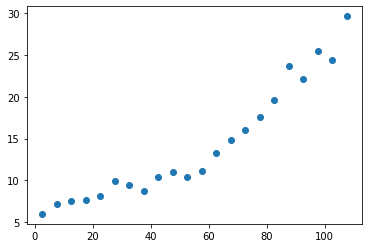

In [28]:
rmseDepth = rmseByDepth(y_test,y_pred)
rmseDepth.to_csv("/content/drive/My Drive/TFM/train-test-val/depth-rmse-RF-20-sqrt.csv",index = False)
plt.scatter(rmseDepth['h'],rmseDepth['rmse'])

In [0]:
ys = pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
ys.to_csv("/content/drive/My Drive/TFM/train-test-val/ytest-ypred-GLOBAL-RF-20-sqrt.csv",index = False)

In [0]:
data_A['z_pred'] = bestRF.predict(scaler.transform(X_A))
data_B['z_pred'] = bestRF.predict(scaler.transform(X_B))
data_C['z_pred'] = bestRF.predict(scaler.transform(X_C))
data_G['z_pred'] = bestRF.predict(scaler.transform(X_G))

In [0]:
data_A.to_csv("/content/drive/My Drive/TFM/train-test-val/data-all-A-RF-20-sqrt.csv",index = False)
data_B.to_csv("/content/drive/My Drive/TFM/train-test-val/data-all-B-RF-20-sqrt.csv",index = False)
data_C.to_csv("/content/drive/My Drive/TFM/train-test-val/data-all-C-RF-20-sqrt.csv",index = False)
data_G.to_csv("/content/drive/My Drive/TFM/train-test-val/data-all-G-RF-20-sqrt.csv",index = False)

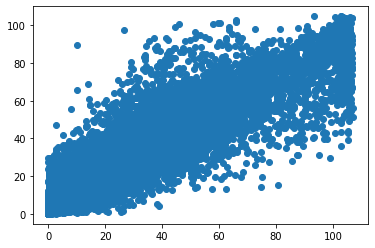

In [32]:
plt.scatter(y_test,y_pred)

# Gradient Boosting

In [0]:
parameters = {"max_depth":np.arange(10,101,10)}
gbreg = gb(n_estimators = 500,max_features = "sqrt",validation_fraction = 0.05,n_iter_no_change = 10,random_state = 20,tol = 0.01)
rfReg = GridSearchCV(gbreg,parameters,cv = 5,scoring = "neg_root_mean_squared_error")
rfReg.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features='sqrt',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=500,
                                                 n_iter_no_change=10,
                 

In [0]:
cv_results = pd.DataFrame(rfReg.cv_results_)
cv_results = cv_results.drop(columns = ['params'])
cv_results
#v_results.to_csv("/content/drive/My Drive/TFM/train-test-val/gridsearchcv-results-gb.csv",index = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,374.787847,31.214115,1.307010,0.098904,10,-24.632899,-13.745773,-13.762028,-9.075303,-5.461938,-13.335588,6.451724,10
1,69.303643,2.819643,0.789814,0.245146,20,-11.309234,-13.842028,-13.920872,-8.814056,-5.067002,-10.590638,3.342011,1
2,90.216528,8.583300,1.502949,0.627926,30,-14.147875,-14.124326,-14.175043,-8.991172,-5.148564,-11.317396,3.674845,8
3,96.167553,10.045795,1.605572,0.689335,40,-14.471448,-14.088459,-14.178181,-9.029074,-5.103885,-11.374209,3.731995,9
4,97.440792,12.494731,1.648567,0.726944,50,-13.858561,-14.122633,-14.215075,-9.008798,-5.132820,-11.267577,3.641143,7
5,97.819220,10.554130,1.650695,0.716848,60,-10.740356,-14.101378,-14.188764,-8.992130,-5.129334,-10.630392,3.396097,2
6,96.174330,9.487433,1.601692,0.680297,70,-10.740356,-14.101541,-14.188764,-8.992130,-5.129334,-10.630425,3.396131,3
7,96.339122,9.871218,1.617017,0.690480,80,-10.740356,-14.101541,-14.188764,-8.992130,-5.129334,-10.630425,3.396131,3
8,96.319501,9.524730,1.615577,0.652270,90,-10.740356,-14.101541,-14.188764,-8.992130,-5.129334,-10.630425,3.396131,3
9,94.726722,10.601826,1.601040,0.663758,100,-10.740356,-14.101541,-14.188764,-8.992130,-5.129334,-10.630425,3.396131,3


In [0]:
cv_results.to_csv("/content/drive/My Drive/TFM/train-test-val/gridsearchcv-results-gb.csv",index = False)

In [0]:
bestGB = rfReg.best_estimator_

In [0]:
rfReg.best_params_

{'max_depth': 20}

In [0]:
fidf = pd.DataFrame({"feature":X_A.columns,"feature_importances":bestGB.feature_importances_})
fidf.to_csv("/content/drive/My Drive/TFM/train-test-val/feature-importances-gb.csv",index = False)

In [0]:
y_pred_A = bestGB.predict(scaler.transform(X_test_A))
y_pred_B = bestGB.predict(scaler.transform(X_test_B))
y_pred_C = bestGB.predict(scaler.transform(X_test_C))
y_pred_G = bestGB.predict(scaler.transform(X_test_G))

ys_A = pd.DataFrame({"y_test":y_test_A,"y_pred":y_pred_A})
ys_B = pd.DataFrame({"y_test":y_test_B,"y_pred":y_pred_B})
ys_C = pd.DataFrame({"y_test":y_test_C,"y_pred":y_pred_C})
ys_G = pd.DataFrame({"y_test":y_test_G,"y_pred":y_pred_G})

ys_A.to_csv("/content/drive/My Drive/TFM/train-test-val/ytest-ypred-A-GB.csv",index = False)
ys_B.to_csv("/content/drive/My Drive/TFM/train-test-val/ytest-ypred-B-GB.csv",index = False)
ys_C.to_csv("/content/drive/My Drive/TFM/train-test-val/ytest-ypred-C-GB.csv",index = False)
ys_G.to_csv("/content/drive/My Drive/TFM/train-test-val/ytest-ypred-G-GB.csv",index = False)

In [0]:
print("Alto-Lindoso = R2: %0.2f, RMSE %0.3f" % (r2(y_test_A,y_pred_A),mse(y_test_A,y_pred_A,squared = False)))
print("Bubal = R2: %0.2f, RMSE %0.3f" % (r2(y_test_B,y_pred_B),mse(y_test_B,y_pred_B,squared = False)))
print("Canelles = R2: %0.2f, RMSE %0.3f" % (r2(y_test_C,y_pred_C),mse(y_test_C,y_pred_C,squared = False)))
print("Grado = R2: %0.2f, RMSE %0.3f" % (r2(y_test_G,y_pred_G),mse(y_test_G,y_pred_G,squared = False)))

Alto-Lindoso = R2: 0.72, RMSE 7.949
Bubal = R2: 0.87, RMSE 3.410
Canelles = R2: 0.77, RMSE 13.481
Grado = R2: 0.92, RMSE 4.368


In [0]:
y_test = np.array(pd.concat([y_test_A,y_test_B,y_test_C,y_test_G]))
y_pred = np.concatenate((y_pred_A,y_pred_B,y_pred_C,y_pred_G))

In [0]:
print("Total = R2: %0.2f, RMSE %0.3f" % (r2(y_test,y_pred),mse(y_test,y_pred,squared = False)))

Total = R2: 0.82, RMSE 10.159


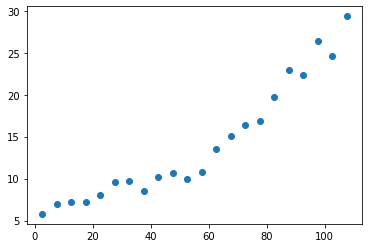

In [0]:
rmseDepth = rmseByDepth(y_test,y_pred)
rmseDepth.to_csv("/content/drive/My Drive/TFM/train-test-val/depth-rmse-GB.csv",index = False)
plt.scatter(rmseDepth['h'],rmseDepth['rmse'])

In [0]:
ys = pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
ys.to_csv("/content/drive/My Drive/TFM/train-test-val/ytest-ypred-GLOBAL-GB.csv",index = False)

In [0]:
data_A['z_pred'] = bestGB.predict(scaler.transform(X_A))
data_B['z_pred'] = bestGB.predict(scaler.transform(X_B))
data_C['z_pred'] = bestGB.predict(scaler.transform(X_C))
data_G['z_pred'] = bestGB.predict(scaler.transform(X_G))

In [0]:
data_A.to_csv("/content/drive/My Drive/TFM/train-test-val/data-all-A-GB.csv",index = False)
data_B.to_csv("/content/drive/My Drive/TFM/train-test-val/data-all-B-GB.csv",index = False)
data_C.to_csv("/content/drive/My Drive/TFM/train-test-val/data-all-C-GB.csv",index = False)
data_G.to_csv("/content/drive/My Drive/TFM/train-test-val/data-all-G-GB.csv",index = False)

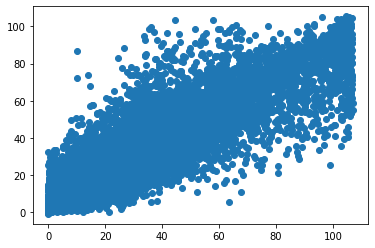

In [0]:
plt.scatter(y_test,y_pred)

In [0]:
bestGB.n_estimators_

47

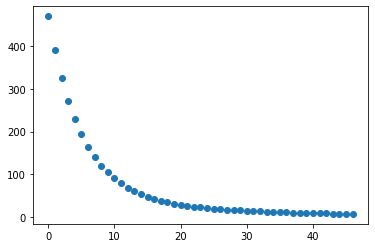

In [0]:
score_estimators = pd.DataFrame({"estimator":np.arange(0,bestGB.train_score_.shape[0],1),"score":bestGB.train_score_})
score_estimators.to_csv("/content/drive/My Drive/TFM/train-test-val/score-estimators-gb.csv",index = False)
plt.scatter(score_estimators['estimator'],score_estimators['score'])